# basic data exploration

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
# read in the data
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df['parental_education_level'].describe()

count             909
unique              3
top       High School
freq              392
Name: parental_education_level, dtype: object

In [6]:
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')

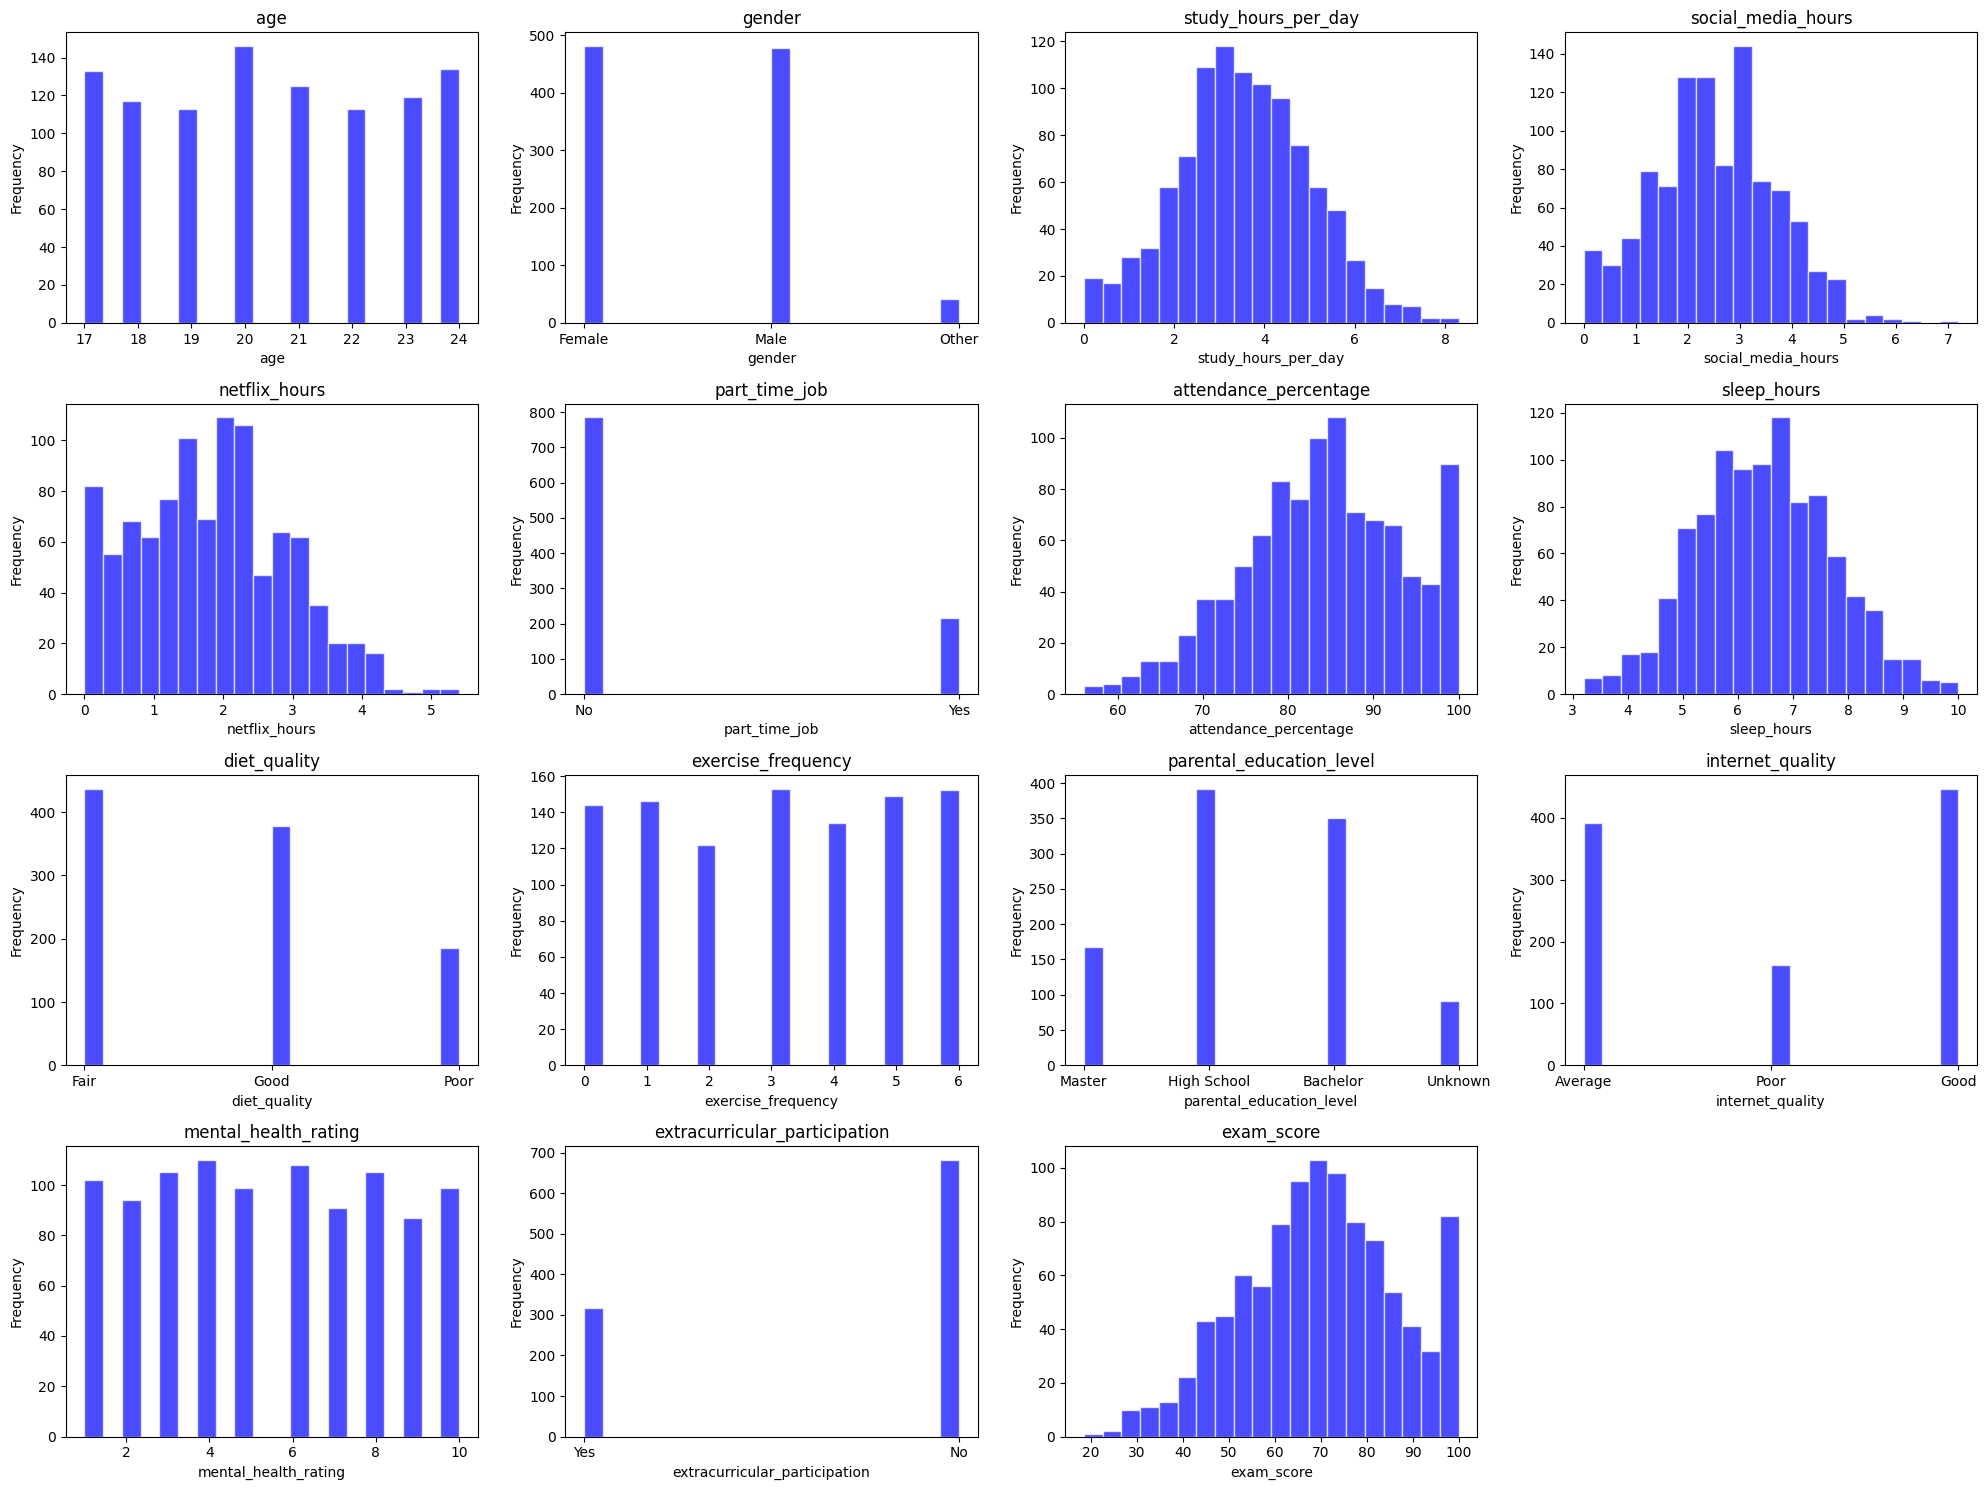

In [7]:
plt.figure(figsize=(20, 15))
for i in range(1, df.shape[1]):
    plt.subplot(4, 4, i)
    plt.hist(df.iloc[:, i], bins=20, color='blue', alpha=0.7, edgecolor='white')
    plt.title(df.columns[i])
    plt.xlabel(df.columns[i])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

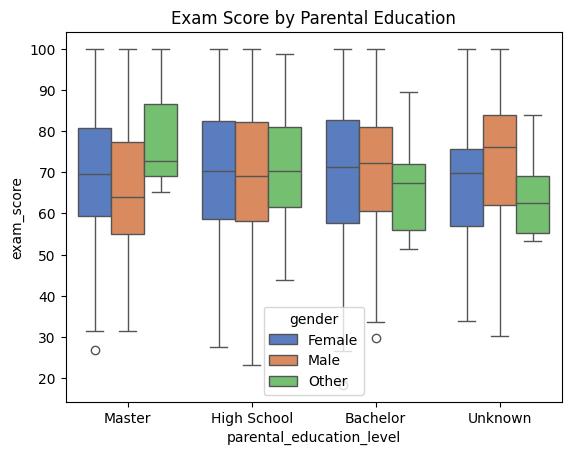

In [8]:
ax = sns.boxplot(x='parental_education_level', y='exam_score', data=df, hue='gender', palette='muted')
plt.title('Exam Score by Parental Education')
plt.show()

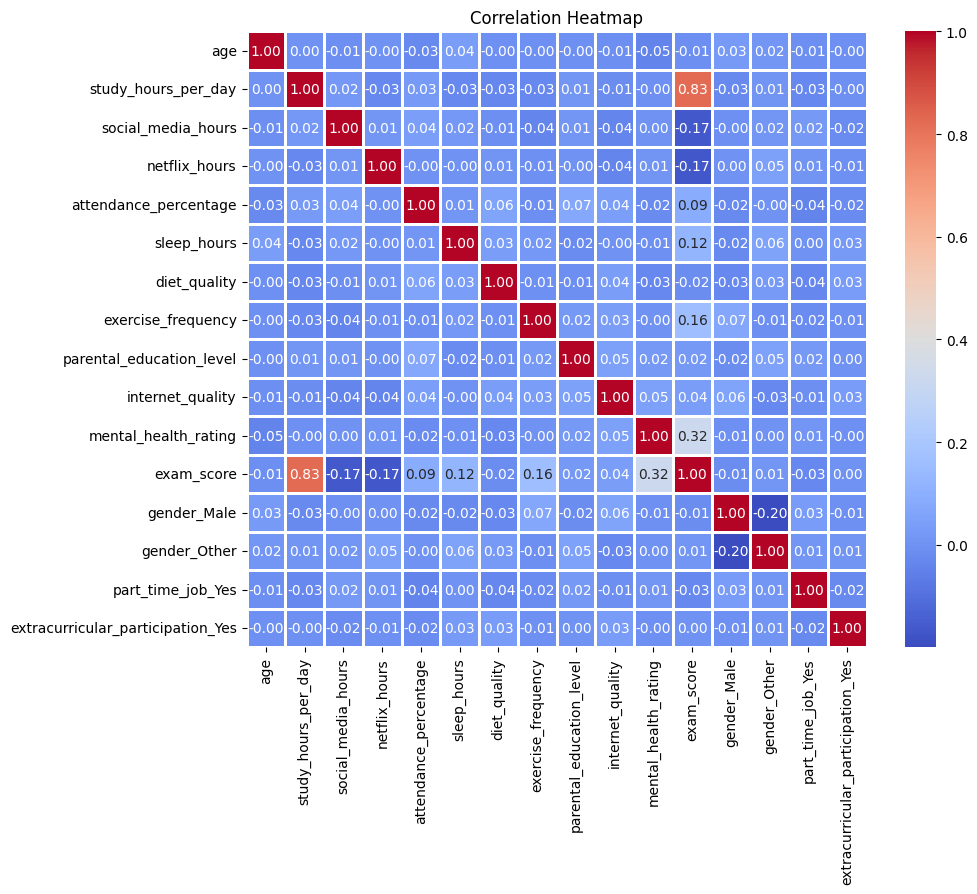

In [9]:
diet_quality = {
    'Good': 1,
    "Fair": 2,
    "Poor": 3
}
parental_education_level = {
    'Master': 1,
    'Bachelor': 2,
    'High School': 3,
    'Unknown': 4,
}
internet_quality = {
    'Good': 1,
    'Average': 2,
    'Poor': 3
}
dummies = pd.get_dummies(df[['gender', 'part_time_job', 'extracurricular_participation']], drop_first=True)

hdf = df.drop(columns=['student_id', 'gender', 'part_time_job', 'extracurricular_participation'])
hdf['diet_quality'] = hdf['diet_quality'].map(diet_quality)
hdf['parental_education_level'] = hdf['parental_education_level'].map(parental_education_level)
hdf['internet_quality'] = hdf['internet_quality'].map(internet_quality)

hdf = pd.concat([hdf, dummies], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(hdf.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

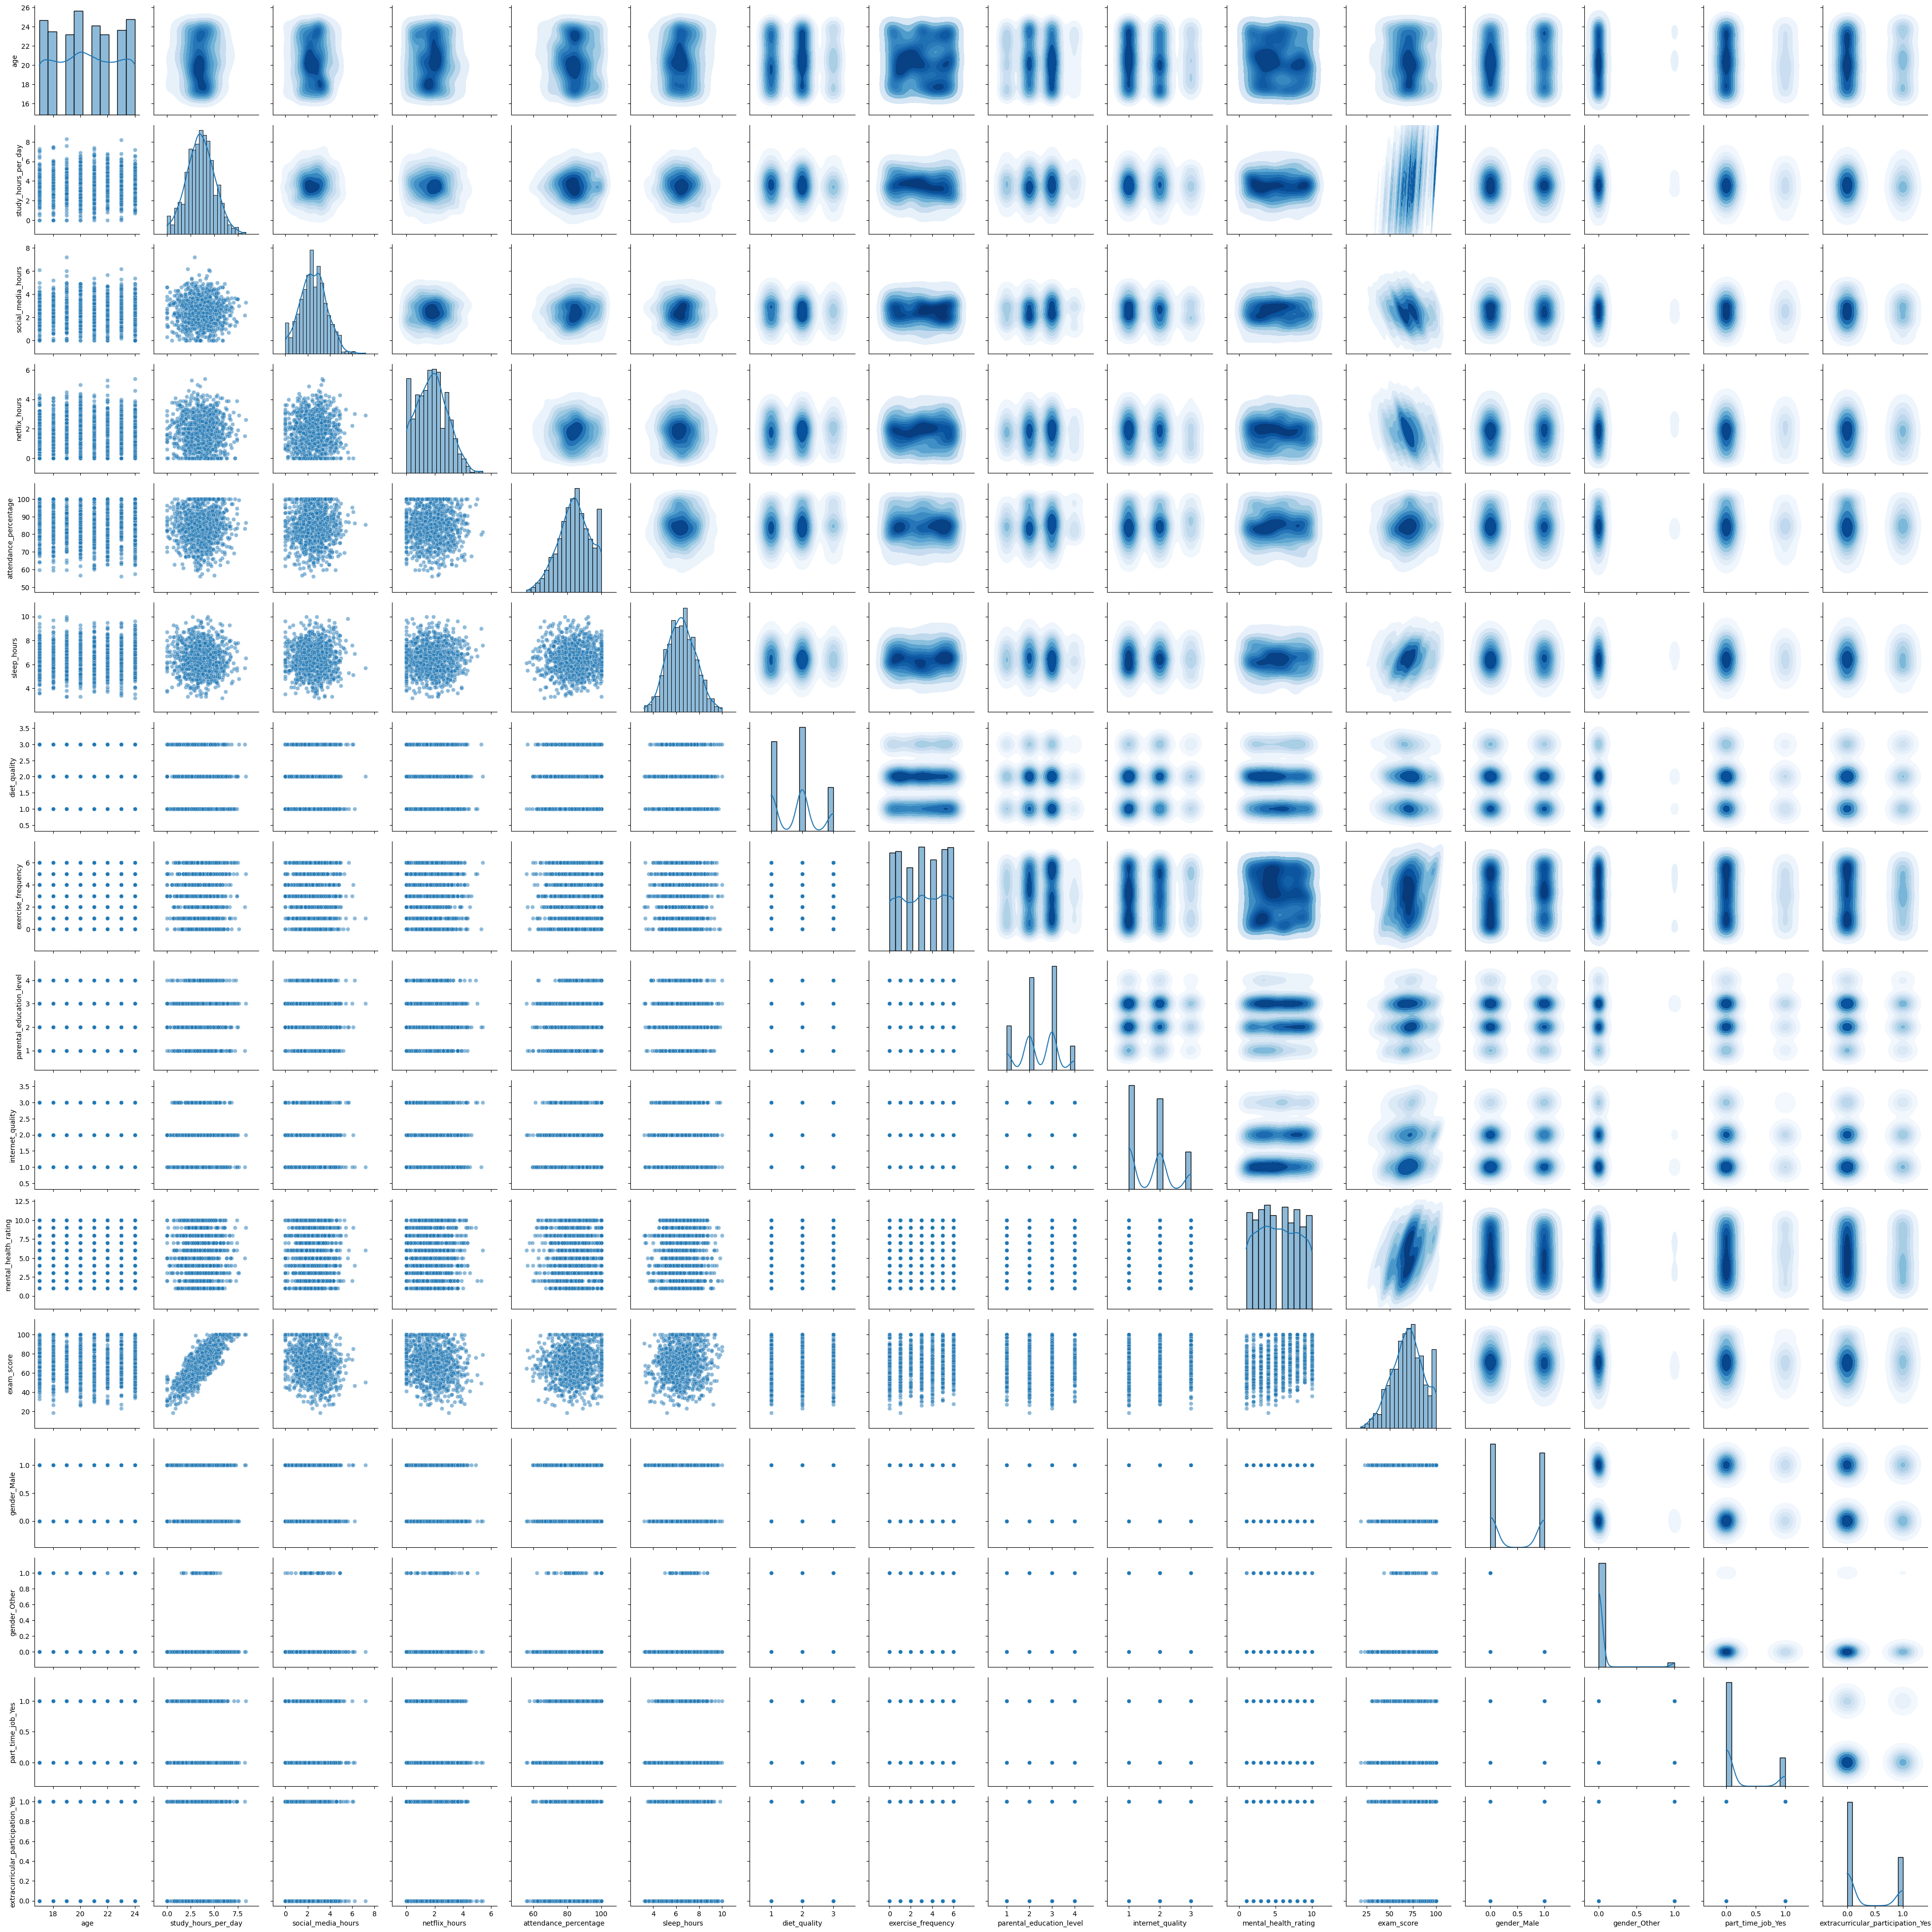

In [ ]:
g = sns.PairGrid(hdf, diag_sharey=False)
g.map_lower(sns.scatterplot, alpha=0.5)
g.map_diag(sns.histplot, kde=True)
g.map_upper(sns.kdeplot)
plt.show()